In [126]:
import pandas as pd
import numpy as np
from datetime import datetime
import locale
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score


In [127]:
# Unemployment data : https://www.bls.gov/data/
unemp_rate = pd.read_csv('bls_table.csv')
unemp_rate.head(10)

,Date,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino,Unnamed: 9
0,Jan 2015,5.7,5.3,5.0,18.5,4.9,10.3,4.0,6.7,NaN
1,Feb 2015,5.5,5.2,4.9,16.9,4.7,10.1,4.0,6.8,NaN
2,Mar 2015,5.4,5.1,4.9,17.5,4.8,9.9,3.2,6.8,NaN
3,Apr 2015,5.4,5.0,5.0,17.2,4.7,9.7,4.4,6.8,NaN
4,May 2015,5.6,5.2,5.1,17.8,4.8,10.3,4.1,6.8,NaN
5,Jun 2015,5.3,4.8,4.7,18.0,4.6,9.7,3.9,6.7,NaN
6,Jul 2015,5.2,4.8,4.8,16.4,4.5,9.1,3.9,6.9,NaN
7,Aug 2015,5.1,4.7,4.6,16.9,4.4,9.4,3.4,6.6,NaN
8,Sep 2015,5.0,4.7,4.6,16.5,4.4,9.3,3.5,6.2,NaN
9,Oct 2015,5.0,4.7,4.6,15.9,4.4,9.0,3.5,6.3,NaN


In [128]:
# Job openings and hires data : https://www.bls.gov/data/
job_open = pd.read_csv('bls_table (1).csv')
job_open.head(10)

,Date,Total nonfarm job openings,Total nonfarm hires,Total nonfarm separations,Total private job openings,Total private hires,Total private separations,Government job openings,Government hires,Government separations,Unnamed: 10
0,Jan 2015,"5,344,000","5,061,000","4,886,000","4,818,000","4,744,000","4,577,000","526,000","316,000","309,000",NaN
1,Feb 2015,"5,466,000","5,127,000","4,869,000","4,950,000","4,807,000","4,557,000","515,000","320,000","312,000",NaN
2,Mar 2015,"5,210,000","5,126,000","5,102,000","4,709,000","4,797,000","4,765,000","501,000","328,000","337,000",NaN
3,Apr 2015,"5,598,000","5,196,000","4,944,000","5,077,000","4,847,000","4,626,000","521,000","349,000","318,000",NaN
4,May 2015,"5,563,000","5,142,000","4,825,000","5,040,000","4,819,000","4,504,000","523,000","323,000","321,000",NaN
5,Jun 2015,"5,248,000","5,125,000","4,978,000","4,778,000","4,789,000","4,635,000","471,000","336,000","343,000",NaN
6,Jul 2015,"6,056,000","5,150,000","4,848,000","5,507,000","4,798,000","4,531,000","548,000","352,000","317,000",NaN
7,Aug 2015,"5,467,000","5,163,000","5,032,000","4,973,000","4,822,000","4,708,000","494,000","341,000","324,000",NaN
8,Sep 2015,"5,488,000","5,287,000","5,110,000","5,018,000","4,964,000","4,774,000","470,000","323,000","335,000",NaN
9,Oct 2015,"5,773,000","5,338,000","5,032,000","5,246,000","4,978,000","4,688,000","527,000","360,000","344,000",NaN


In [129]:
# Merging both dataframes
df = pd.merge(unemp_rate, job_open, how='left')
df.head()

,Date,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino,Unnamed: 9,Total nonfarm job openings,Total nonfarm hires,Total nonfarm separations,Total private job openings,Total private hires,Total private separations,Government job openings,Government hires,Government separations,Unnamed: 10
0,Jan 2015,5.7,5.3,5.0,18.5,4.9,10.3,4.0,6.7,NaN,"5,344,000","5,061,000","4,886,000","4,818,000","4,744,000","4,577,000","526,000","316,000","309,000",NaN
1,Feb 2015,5.5,5.2,4.9,16.9,4.7,10.1,4.0,6.8,NaN,"5,466,000","5,127,000","4,869,000","4,950,000","4,807,000","4,557,000","515,000","320,000","312,000",NaN
2,Mar 2015,5.4,5.1,4.9,17.5,4.8,9.9,3.2,6.8,NaN,"5,210,000","5,126,000","5,102,000","4,709,000","4,797,000","4,765,000","501,000","328,000","337,000",NaN
3,Apr 2015,5.4,5.0,5.0,17.2,4.7,9.7,4.4,6.8,NaN,"5,598,000","5,196,000","4,944,000","5,077,000","4,847,000","4,626,000","521,000","349,000","318,000",NaN
4,May 2015,5.6,5.2,5.1,17.8,4.8,10.3,4.1,6.8,NaN,"5,563,000","5,142,000","4,825,000","5,040,000","4,819,000","4,504,000","523,000","323,000","321,000",NaN


In [130]:
# Picking variables that I will use for the data frame
new_df = df[['Date', 'Total', 'Total nonfarm job openings', 'Total nonfarm hires', 'Total private job openings', 'Total private hires', 'Government job openings', 'Government hires']]
new_df.head()

,Date,Total,Total nonfarm job openings,Total nonfarm hires,Total private job openings,Total private hires,Government job openings,Government hires
0,Jan 2015,5.7,"5,344,000","5,061,000","4,818,000","4,744,000","526,000","316,000"
1,Feb 2015,5.5,"5,466,000","5,127,000","4,950,000","4,807,000","515,000","320,000"
2,Mar 2015,5.4,"5,210,000","5,126,000","4,709,000","4,797,000","501,000","328,000"
3,Apr 2015,5.4,"5,598,000","5,196,000","5,077,000","4,847,000","521,000","349,000"
4,May 2015,5.6,"5,563,000","5,142,000","5,040,000","4,819,000","523,000","323,000"


In [131]:
# Renaming columns
compl_df = new_df.rename(columns={"Total": "Total Unemployment Rate"})
compl_df.head()

,Date,Total Unemployment Rate,Total nonfarm job openings,Total nonfarm hires,Total private job openings,Total private hires,Government job openings,Government hires
0,Jan 2015,5.7,"5,344,000","5,061,000","4,818,000","4,744,000","526,000","316,000"
1,Feb 2015,5.5,"5,466,000","5,127,000","4,950,000","4,807,000","515,000","320,000"
2,Mar 2015,5.4,"5,210,000","5,126,000","4,709,000","4,797,000","501,000","328,000"
3,Apr 2015,5.4,"5,598,000","5,196,000","5,077,000","4,847,000","521,000","349,000"
4,May 2015,5.6,"5,563,000","5,142,000","5,040,000","4,819,000","523,000","323,000"


In [132]:
# Changing date format

date1 = "2015-01"  # input start date
date2 = "2022-10"  # input end date

month_list = [i.strftime("%m-%y") for i in pd.date_range(start=date1, end=date2, freq='MS')]
compl_df['month_list'] = month_list
compl_df.head()

,Date,Total Unemployment Rate,Total nonfarm job openings,Total nonfarm hires,Total private job openings,Total private hires,Government job openings,Government hires,month_list
0,Jan 2015,5.7,"5,344,000","5,061,000","4,818,000","4,744,000","526,000","316,000",01-15
1,Feb 2015,5.5,"5,466,000","5,127,000","4,950,000","4,807,000","515,000","320,000",02-15
2,Mar 2015,5.4,"5,210,000","5,126,000","4,709,000","4,797,000","501,000","328,000",03-15
3,Apr 2015,5.4,"5,598,000","5,196,000","5,077,000","4,847,000","521,000","349,000",04-15
4,May 2015,5.6,"5,563,000","5,142,000","5,040,000","4,819,000","523,000","323,000",05-15


In [133]:
# Removing commas from the numbers and transforming variable type
df = compl_df.replace(',','', regex = True)
print(df.dtypes)

Date                           object
Total Unemployment Rate       float64
Total nonfarm job openings     object
Total nonfarm hires            object
Total private job openings     object
Total private hires            object
Government job openings        object
Government hires               object
month_list                     object
dtype: object


In [134]:
# Removing commas from the numbers and transforming variable type
df = compl_df.replace(',','', regex = True)

In [135]:
# Removing October 2022 from dataframe
df = df[:-1]
df.head()

,Date,Total Unemployment Rate,Total nonfarm job openings,Total nonfarm hires,Total private job openings,Total private hires,Government job openings,Government hires,month_list
0,Jan 2015,5.7,5344000,5061000,4818000,4744000,526000,316000,01-15
1,Feb 2015,5.5,5466000,5127000,4950000,4807000,515000,320000,02-15
2,Mar 2015,5.4,5210000,5126000,4709000,4797000,501000,328000,03-15
3,Apr 2015,5.4,5598000,5196000,5077000,4847000,521000,349000,04-15
4,May 2015,5.6,5563000,5142000,5040000,4819000,523000,323000,05-15


In [136]:
# Transforming variable types to integers
df['Total nonfarm job openings'] = df['Total nonfarm job openings'].astype(int)
df['Total nonfarm hires'] = df['Total nonfarm hires'].astype(int)
df['Total private job openings'] = df['Total private job openings'].astype(int)
df['Total private hires'] = df['Total private hires'].astype(int)
df['Government job openings'] = df['Government job openings'].astype(int)
df['Government hires'] = df['Government hires'].astype(int)


print(df.dtypes)

Date                           object
Total Unemployment Rate       float64
Total nonfarm job openings      int64
Total nonfarm hires             int64
Total private job openings      int64
Total private hires             int64
Government job openings         int64
Government hires                int64
month_list                     object
dtype: object


In [137]:
# Moving columns

cols = list(df.columns.values) 
cols.pop(cols.index('Date')) 
cols.pop(cols.index('month_list')) 
df = df[['month_list','Date']+cols] 
df.head()


,month_list,Date,Total Unemployment Rate,Total nonfarm job openings,Total nonfarm hires,Total private job openings,Total private hires,Government job openings,Government hires
0,01-15,Jan 2015,5.7,5344000,5061000,4818000,4744000,526000,316000
1,02-15,Feb 2015,5.5,5466000,5127000,4950000,4807000,515000,320000
2,03-15,Mar 2015,5.4,5210000,5126000,4709000,4797000,501000,328000
3,04-15,Apr 2015,5.4,5598000,5196000,5077000,4847000,521000,349000
4,05-15,May 2015,5.6,5563000,5142000,5040000,4819000,523000,323000


In [138]:
# Dropping 'Date' column
dff = df.drop(['Date'], axis=1)

In [139]:
# Renaming date column and using 'date/time' format
df = dff.rename(columns={"month_list": "Date"})
df.head()

min_month = "2015-01"
max_month = "2022-09"

Date = pd.period_range(min_month, max_month, freq='M')
print(Date)

df['Date'] = Date
df.head(5)

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
             '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-

,Date,Total Unemployment Rate,Total nonfarm job openings,Total nonfarm hires,Total private job openings,Total private hires,Government job openings,Government hires
0,2015-01,5.7,5344000,5061000,4818000,4744000,526000,316000
1,2015-02,5.5,5466000,5127000,4950000,4807000,515000,320000
2,2015-03,5.4,5210000,5126000,4709000,4797000,501000,328000
3,2015-04,5.4,5598000,5196000,5077000,4847000,521000,349000
4,2015-05,5.6,5563000,5142000,5040000,4819000,523000,323000


In [140]:
# Adding new date column to dataframe
cols = list(df.columns.values) 
cols.pop(cols.index('Date')) 
df = df[['Date']+cols] #Create new dataframe with columns in the order you want
df.head()
print(df.dtypes)

Date                          period[M]
Total Unemployment Rate         float64
Total nonfarm job openings        int64
Total nonfarm hires               int64
Total private job openings        int64
Total private hires               int64
Government job openings           int64
Government hires                  int64
dtype: object


In [141]:
# Removing hyphen from date column
Date = df['Date'].astype(str).replace('-','', regex = True)
Date

0     201501
1     201502
2     201503
3     201504
4     201505
       ...  
88    202205
89    202206
90    202207
91    202208
92    202209
Name: Date, Length: 93, dtype: object

In [142]:
# Creating binary variable welfare_01 using a forloop and applying if/else condition
Welfare_01 = []
for values in df['Total Unemployment Rate']:
    if values < 5: # Healthy unemployment rate according to economists
        Welfare_01.append(0)
    else:
        Welfare_01.append(1)

# Adding new variable to column
Welfare_01        
df['Welfare_01'] = Welfare_01
df.head(5)

,Date,Total Unemployment Rate,Total nonfarm job openings,Total nonfarm hires,Total private job openings,Total private hires,Government job openings,Government hires,Welfare_01
0,2015-01,5.7,5344000,5061000,4818000,4744000,526000,316000,1
1,2015-02,5.5,5466000,5127000,4950000,4807000,515000,320000,1
2,2015-03,5.4,5210000,5126000,4709000,4797000,501000,328000,1
3,2015-04,5.4,5598000,5196000,5077000,4847000,521000,349000,1
4,2015-05,5.6,5563000,5142000,5040000,4819000,523000,323000,1


In [143]:
# Replace date for data visualization
Unemployment = df['Total Unemployment Rate']


In [144]:
# Finding the average unemployment rate of each year
year_15 = df['Total Unemployment Rate'].iloc[0:11].mean()
year_16 = df['Total Unemployment Rate'].iloc[12:23].mean()
year_17 = df['Total Unemployment Rate'].iloc[24:35].mean()
year_18 = df['Total Unemployment Rate'].iloc[36:47].mean()
year_19 = df['Total Unemployment Rate'].iloc[48:59].mean()
year_20 = df['Total Unemployment Rate'].iloc[60:71].mean()
year_21 = df['Total Unemployment Rate'].iloc[72:83].mean()
year_22 = df['Total Unemployment Rate'].iloc[84:].mean()
year_15

5.300000000000001

In [145]:
df.describe(include = 'all')

,Date,Total Unemployment Rate,Total nonfarm job openings,Total nonfarm hires,Total private job openings,Total private hires,Government job openings,Government hires,Welfare_01
count,93,93.000000,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,93.000000,93.000000
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.937634,7.274022e+06,5.770710e+06,6.583731e+06,5.411333e+06,6.902796e+05,359430.107527,0.344086
std,NaN,1.885869,1.902163e+06,5.621388e+05,1.733625e+06,5.529921e+05,1.821700e+05,40196.906070,0.477644
min,NaN,3.500000,4.709000e+06,4.031000e+06,4.068000e+06,3.805000e+06,4.700000e+05,227000.000000,0.000000
25%,NaN,3.800000,5.919000e+06,5.358000e+06,5.340000e+06,5.007000e+06,5.380000e+05,341000.000000,0.000000
50%,NaN,4.400000,6.818000e+06,5.704000e+06,6.120000e+06,5.335000e+06,6.580000e+05,355000.000000,0.000000
75%,NaN,5.200000,7.417000e+06,6.028000e+06,6.751000e+06,5.699000e+06,7.620000e+05,376000.000000,1.000000


In [146]:
variables = df[['Total nonfarm job openings','Total nonfarm hires','Total private job openings','Total private hires','Government job openings','Government hires']]
variables.head()

,Total nonfarm job openings,Total nonfarm hires,Total private job openings,Total private hires,Government job openings,Government hires
0,5344000,5061000,4818000,4744000,526000,316000
1,5466000,5127000,4950000,4807000,515000,320000
2,5210000,5126000,4709000,4797000,501000,328000
3,5598000,5196000,5077000,4847000,521000,349000
4,5563000,5142000,5040000,4819000,523000,323000


In [147]:
# For visualizing the unemployment rate for each year
df_2 = [year_15, year_16, year_17, year_18, year_19, year_20, year_21, year_22]
df_2 = pd.DataFrame({'Avg_Unemployment_Rate':df_2})
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df_2['years'] = years
df_2

,Avg_Unemployment_Rate,years
0,5.300000,2015
1,4.890909,2016
2,4.381818,2017
3,3.890909,2018
4,3.681818,2019
5,8.218182,2020
6,5.490909,2021
7,3.655556,2022


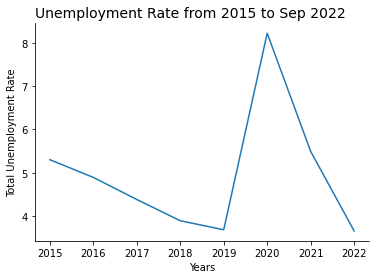

In [148]:
# Line plot of unemployment rate from 2015-2022
ax = plt.subplot()
ax.plot(df_2['years'], df_2['Avg_Unemployment_Rate'])
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.title('Unemployment Rate from 2015 to Sep 2022', size=14, loc='left')
plt.xlabel('Years')
plt.ylabel('Total Unemployment Rate')

plt.savefig('Unemployment_Rate_by_year.png')

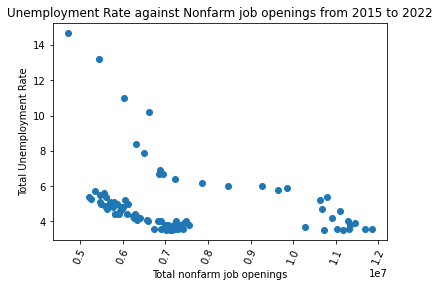

In [149]:
# Scatter plot of nonfarm jop openings and unemployment rate
x = df['Total nonfarm job openings']
y = df['Total Unemployment Rate']
plt.scatter(x,y)
plt.xlabel('Total nonfarm job openings')
plt.xticks(rotation = 67)
plt.ylabel('Total Unemployment Rate',)
plt.title('Unemployment Rate against Nonfarm job openings from 2015 to 2022')


plt.savefig('Unemployment_v_jobopenings.png')

In [150]:
# Target array and feature matrix
y = df['Welfare_01'] 
X = df[['Total Unemployment Rate','Total nonfarm job openings', 'Total nonfarm hires', 'Total private job openings', 'Government hires', 'Government job openings']]

In [151]:
# Splitting data into training and test size
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=10)

In [152]:
# Fitting for logistic regression
logit = LogisticRegression()
logit.fit(Xtrain, ytrain)

LogisticRegression()

In [153]:
# Creating predictions
logit_predictions = logit.predict(Xtest)
logit_prob = logit.predict_proba(Xtest)
print(logit_predictions)
print(logit_prob[::,1])

[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
[0.17877831 0.03513579 0.29982079 0.22325776 0.31276315 0.9220832
 0.81506073 0.15036411 0.16836528 0.47374226 0.19826597 0.03661481
 0.453437   0.2455151  0.44967828 0.14736735 0.0490315  0.42767388
 0.15094799 0.23122927 0.38232071 0.429426   0.18683696 0.37368702
 0.33756282 0.6211456  0.28348887 0.0192371  0.47167034 0.3853873
 0.01804469 0.14264949 0.02195431 0.30118082 0.27868847 0.42405553
 0.36245309 0.18401474 0.24043711 0.11936484 0.03020163 0.22671941
 0.23793002 0.16080354 0.22343973 0.23036107 0.31082002]


In [154]:
# Conducting a confusion matrix and checking accuracy score of test data
print('Accuracy:', logit.score(Xtest, ytest))
confusion_matrix(ytest, logit.predict(Xtest))

Accuracy: 0.6595744680851063


array([[29,  1],
       [15,  2]])

In [155]:
# Conducting a confusion matrix and checking accuracy score of train data
logit.fit(Xtrain, ytrain)
print('Logit Training score: ', logit.score(Xtest, ytest))
y_pred = logit.predict_proba(Xtest)[::,1]
confusion_matrix(ytrain, logit.predict(Xtrain))

Logit Training score:  0.6595744680851063


array([[31,  0],
       [ 9,  6]])

In [156]:
# Checking the AUC 
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_pred)
logit_rates = pd.DataFrame(dict(fpr=false_positive_rate, tpr=true_positive_rate))
logit_auc = auc(logit_rates['fpr'], logit_rates['tpr'])
print('Logit AUC: ', logit_auc) #AUC

Logit AUC:  0.5333333333333333


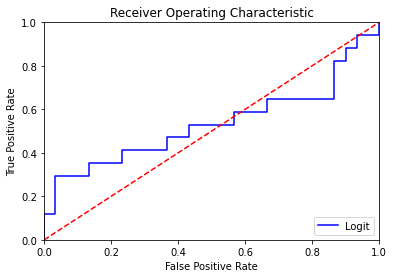

In [157]:
# Graphing the ROC
fig3 = plt.figure() # this allows for layering
plt.plot(logit_rates.fpr, logit_rates.tpr, 'b', label = 'Logit')
plt.plot([0, 1], [0, 1],'r--')  # 'r--' for red and dashed
plt.xlim([0, 1]) # sets limit for the axis
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right') # legend into the lower right hand corner
plt.savefig('logit.png')

In [158]:
#Scaling the data for KNN
scaler = StandardScaler()
Xsc = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
Xsc.head()

,Total Unemployment Rate,Total nonfarm job openings,Total nonfarm hires,Total private job openings,Government hires,Government job openings
0,0.406443,-1.020145,-1.269360,-1.024040,-1.086290,-0.906681
1,0.299816,-0.955660,-1.151315,-0.947487,-0.986241,-0.967391
2,0.246503,-1.090973,-1.153103,-1.087255,-0.786142,-1.044659
3,0.246503,-0.885889,-1.027904,-0.873833,-0.260882,-0.934276
4,0.353129,-0.904389,-1.124486,-0.895291,-0.911204,-0.923238


In [159]:
#Splitting into training and test data
Xsctrain, Xsctest, ytrain, ytest = train_test_split(Xsc, y, test_size=0.2, random_state=10)

In [160]:
#Fitting for KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(Xsctrain, ytrain)
cross_val_score(knn, Xsc, y, cv=5)

array([-2.75114286, -5.12222222,  0.        , -0.75      ,  0.31323077])

In [161]:
#Checking accuracy score for test data
k_range = np.arange(1,11)
train_scores, test_scores = validation_curve(knn, Xsc, y, param_name='n_neighbors',
                                            param_range=k_range, cv=10)

print('Accuracy:', knn.score(Xsctest, ytest))

Accuracy: 0.6502272727272727


In [162]:
#Checking accuracy score for training data
k_range = np.arange(1,11)
train_scores, test_scores = validation_curve(knn, Xsc, y, param_name='n_neighbors',
                                            param_range=k_range, cv=10)

print('Accuracy:', knn.score(Xsctrain, ytrain))

Accuracy: 0.5535333333333333


In [163]:
#Generalization scores for KNN
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_mean

array([-0.15388889,  0.14416667,  0.16765432,  0.18621528,  0.12266667,
        0.06873457,  0.04804989,  0.02835938,  0.06607682,  0.09313333])

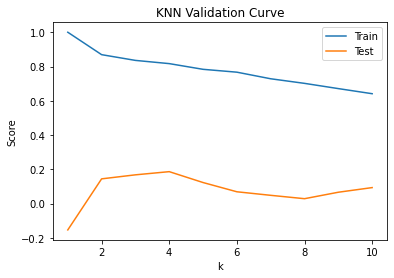

In [164]:
# Validation curve for KNN
plt.plot(k_range, train_mean, label='Train')
plt.plot(k_range, test_mean, label='Test')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('KNN Validation Curve')
plt.legend()

plt.savefig('knn.png')